In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
house_data = pd.read_csv("housing.csv")
house_data

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

In [3]:
# To see how the data correlates with price

house_data.corr()['PRICE']

PRICE               1.000000
BEDROOMS            0.252637
BATHROOMS           0.377133
GARAGE              0.134343
LAND_AREA           0.056855
FLOOR_AREA          0.548497
BUILD_YEAR         -0.157218
CBD_DIST           -0.354327
NEAREST_STN_DIST   -0.095089
POSTCODE           -0.171553
LATITUDE            0.053041
LONGITUDE          -0.183734
NEAREST_SCH_DIST   -0.021941
NEAREST_SCH_RANK   -0.461991
Name: PRICE, dtype: float64

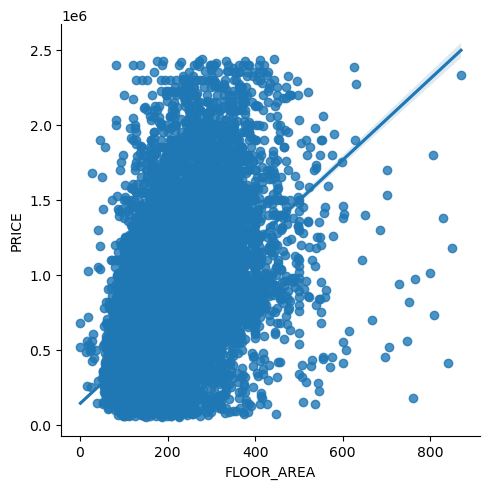

In [4]:
# Scattering the plot with Seaborn

sns.lmplot(x = 'FLOOR_AREA', y = 'PRICE', data = house_data, fit_reg = True)

In [5]:
# Getting all the columns in the CSV file

print(house_data.columns)

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')


In [6]:
x = house_data[['BEDROOMS','BATHROOMS', 'GARAGE', 'FLOOR_AREA', 'BUILD_YEAR']]
y = house_data[['PRICE']]/1000

In [7]:
# Dropping missing values

x = x.dropna()
print(x)

       BEDROOMS  BATHROOMS  GARAGE  FLOOR_AREA  BUILD_YEAR
0             4          2     2.0         160      2003.0
1             3          2     2.0         139      2013.0
2             3          1     1.0          86      1979.0
3             2          1     2.0          59      1953.0
4             4          1     2.0         131      1998.0
...         ...        ...     ...         ...         ...
33648         3          2     2.0         108      2011.0
33649         4          2     2.0         132      2014.0
33650         3          2     1.0         127      1997.0
33651         4          3     2.0         245      2013.0
33654         3          1     2.0          85      1974.0

[28256 rows x 5 columns]


In [8]:
# Dropping the missing values in x makes the training data unequal
# Both the rows of x and y must be same
# First calculate the rows of dataframe x

x_rows = x.shape[0]
# print(x_rows)

# Selecting the data from dataframe y, number of rows equal to that of x

y = y.iloc[0:x_rows]
print(y)

       PRICE
0      565.0
1      365.0
2      287.0
3      255.0
4      325.0
...      ...
28251  631.0
28252  340.0
28253  585.0
28254  188.0
28255  695.0

[28256 rows x 1 columns]


In [9]:
# Splitting the training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [10]:
# Training the model

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()